#### [ 지도학습 - 선형 모델 : 다항회귀 ]

- 주__제 : 농어의 길이에 따른 무게 예측 모델 구현
- 데이터 : ../Data/fish.csv
- 종__류 : 지도학습 - 수치값 예측 즉, 회귀
- 방__법 : 선형모델을 기반으로 구현 => LinearRegression 

[1] 모듈 로딩 및 데이터 준비 <hr>

In [72]:

## [1-1] 모듈 로딩

## 기본 모듈
import numpy as np
import pandas as pd

## 시각화 모듈
import matplotlib.pyplot as plt
import koreanize_matplotlib

## ML전처리 관련
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler

## ML 학습 관련 알고리즘 관련
from sklearn.linear_model import LinearRegression

## ML 성능평가 관련 모듈
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, root_mean_squared_error



[1-2] 실습 데이터 준비

In [73]:
fishDF = pd.read_csv('../Data/fish.csv')
dataDF = fishDF[fishDF['Species'] == 'Perch'] [[ 'Weight', 'Length']]

dataDF.reset_index(inplace=True)
dataDF = dataDF.drop(columns='index')

dataDF.info()

dataDF.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  56 non-null     float64
 1   Length  56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


,Weight,Length
0,5.9,8.4
1,32.0,13.7
2,40.0,15.0
3,51.5,16.2
4,70.0,17.4


In [74]:
## [2-1] 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
targetSR = dataDF[dataDF.columns[0]]

print(featureDF.shape, targetSR.shape)

(56, 1) (56,)


In [75]:
## [2-2] 학습용/테스트용 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    test_size=0.2,
                                                    random_state=10,
                                                    # stratify=targetSR ## 분류에만 사용, 회귀는 X
                                                    )

print(f'[TRAIN] x_train:{x_train.shape},  y_train:{y_train.shape}')
print(f'[TEST] x_test:{x_test.shape},  y_test:{y_test.shape}')

[TRAIN] x_train:(44, 1),  y_train:(44,)
[TEST] x_test:(12, 1),  y_test:(12,)


In [76]:
## [2-3] dt계열을 제외한 선형모델, 거리기반 모델등은 피쳐 스케일링 진행
##          ==> 현재 피쳐 1개 이므로 스케일링 x

[3] 일반 학습 진행 + 성능평가 <hr>

가중치 coef_          : [37.07726677]
절  편 intercept_     : -645.253011298425
n_feature_names_in   : ['Length']
n_features_in_       : 1
train_score : 0.9240032680854626
test_score  : 0.8386116153753963


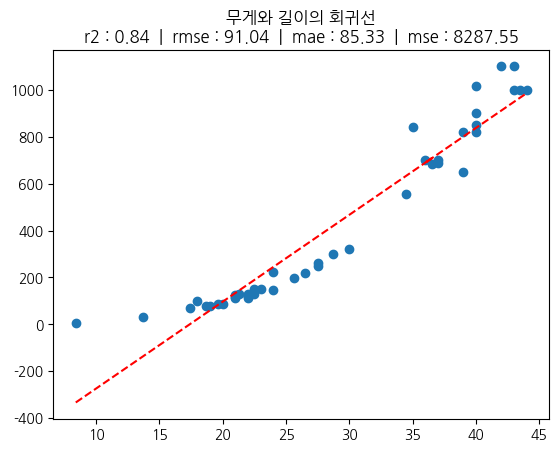

In [77]:

## ==============================================
## 일반 선형 모형
## ==============================================
lrModel = LinearRegression()


## ==============================================
## 학습진행 
## ==============================================
lrModel.fit(x_train, y_train)


## ==============================================
## 학습 후 학습용데이터셋 기반 모델 파라미터 설정
## - 모델 파라미터 : 파라미터이름_ => 피쳐에 곱해지는 가중치 w, 결과 미세조정 bias
## ==============================================
print('가중치 coef_          :', lrModel.coef_)
print('절  편 intercept_     :', lrModel.intercept_)
print('n_feature_names_in   :', lrModel.feature_names_in_)
print('n_features_in_       :', lrModel.n_features_in_)

## ==============================================
## 훈련용 성능평가 & 테스트용 성능평가 비교
## 회귀모델의 score의 기본은 r2_score ==> 0~1: 1에 가까울 수록 좋은 성능!
##                                     관계성이 없다면 마이너스가 나올 수 있음 : 쓰레기 모델(버리뿌자!)
## ==============================================
train_score = lrModel.score(x_train, y_train)
test_score  = lrModel.score(x_test, y_test)
print(f'train_score : {train_score}')
print(f'test_score  : {test_score}')

## 회귀모델 성능지표
pre_weight = lrModel.predict(x_test)
r2_ = r2_score(y_test, pre_weight)
rmse_ = root_mean_squared_error(y_test, pre_weight)
mae_ = mean_absolute_error(y_test, pre_weight)
mse_ = mean_squared_error(y_test, pre_weight)


## ==============================================
## 선형식 시각화 
## ==============================================
x = featureDF
y = lrModel.coef_* x + lrModel.intercept_

plt.plot(x, y, 'r--')
plt.scatter(x_train, y_train)
plt.title(f'무게와 길이의 회귀선\nr2 : {r2_:.2f}  |  rmse : {rmse_:.2f}  |  mae : {mae_:.2f}  |  mse : {mse_:.2f}')
plt.show()

[4] 피쳐 생성 + 학습 진행 + 성능평가 <hr>

In [83]:
## [4-0] 피쳐 스케일링 : 큰값에 대한 모델 영향력 떨어뜨림!
stdScaler = StandardScaler()
scaled_x_train = stdScaler.fit_transform(x_train)
scaled_x_test = stdScaler.transform(x_test)


In [84]:
poly = PolynomialFeatures()

poly_x_train = poly.fit_transform(scaled_x_train)
poly_x_test  = poly.transform(scaled_x_test)
print(x_train.shape, "=>", poly_x_train.shape)

(44, 1) => (44, 3)


In [85]:
lrModel = LinearRegression()
lrModel.fit(poly_x_train, y_train)
score = lrModel.score(poly_x_test, y_test)

## 성능평가
print(f'피처별 가중치 : {lrModel.coef_}')
print(f'선형식 절  편 : {lrModel.intercept_}')
print(f'R2_score    : {score}')


피처별 가중치 : [  0.         337.36399877  87.48972193]
선형식 절  편 : 327.66709625170995
R2_score    : 0.9759141253594011


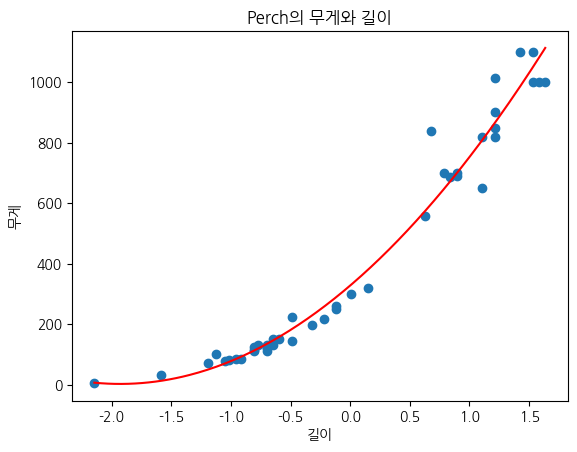

In [102]:
# 길이 값 최소 ~ 최대 구간에서 촘촘하게 생성
x_line = np.linspace(
    scaled_x_train.min(),
    scaled_x_train.max(),
    200
).reshape(-1, 1)

poly_x_line = poly.transform(x_line)

y_line_pred = lrModel.predict(poly_x_line)



## 데이터 시각화
plt.plot(scaled_x_train ,y_train, 'o')
plt.plot(x_line, y_line_pred, 'r')
plt.xlabel('길이')
plt.ylabel('무게')
plt.title('Perch의 무게와 길이')
plt.show()
